Thera Bank Personal Loan Campaign

Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:
Banking

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

---------------------------------------------

# Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [375]:
import warnings
warnings.filterwarnings('ignore')

In [376]:
#Import Libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report

-------------------------

In [377]:
#Load dataset
bplmData = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

------------------------------------

Data Description:
The dataset contains data on 5000 customers. Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [378]:
#let us verify the authenticity of this Dataset based from the given Data Description:
bplmData['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [379]:
#Let us check How many customers opted for Personal Loans
optedforloan_1= bplmData.groupby('Personal Loan')
optedforloan_1 = optedforloan_1.get_group(1)
optedforloan_1.shape

(480, 14)

In [380]:
#Let us check How many customers DID NOT opted for Personal Loans
optedforloan_0= bplmData.groupby('Personal Loan')
optedforloan_0 = optedforloan_0.get_group(0)
optedforloan_0.shape

(4520, 14)

Dataset is verified and authenticated, based from the results above,

It is verified and confirmed that amongst 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign
480 OPTED for loan and 4520 DID NOT opted.

--------------------------------

Let us view the content of our Dataset

In [381]:
#Checking Dataset Columns
bplmData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [382]:
#Checking for Dataset Shape
bplmData.shape

(5000, 14)

In [383]:
#Checking the First 5 Rows of the Dataset
bplmData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [384]:
#Checking the last 5 Rows of the Dataset
bplmData.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [385]:
#Checking for Null Values
bplmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [386]:
#Confirming if Null Values Exist in any Rows
bplmData.isnull().values.any()

False

In [387]:
#Validating if Null Values Exist in any Rows
bplmData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [388]:
#Checking for empty Rows
bplmData.isna().values.any()

False

------------------------

In [389]:
#Statistical Summary
bplmData.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [390]:
#Statistical Summary (Transpose)
bplmData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


-----------------------------------

Dataset Summary

Based from the initial view of our Dataset, it can be noticed that there are 5000 rows containing different customers data and 14 columns which can be collectively grouped into (1)customer demographic information (age, income, etc.), (2)customer-bank relationship (mortgage, securities account, etc.), and (3)customer response to the last personal loan campaign (Personal Loan). 

The mentioned attributes are specifically described below:

ID : Customer's ID
Age: Customer's Age in Years
Experience: #years of professional experience
Income: Annual income of the customer
ZIP Code: Home Address ZIP code.
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any.
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
Credit card: Does the customer use a credit card issued by the bank?

Observations:
- The rows, contains datatypes int64 and float64; 
- Rows does not contain any null values or missing values as based on Pandas isnull() and isna() query. 
- Attribute ID is irrelevant in predicting the likelihood of a liability customer buying personal loans.
- It can be seen in the Statistical Summary using  describe() function that the min value for Experience is -3. An experience cannot be a negative value. This signifies that there are negative values in the Experience attribute.
- Attributes such as Family, Personal Loan, Securities Account, CD Account, Online, CreditCard are Categorical variables.
- Dependent variables related to Bank are attributes Personal Loan, Securities Account, CD Account, Online, CreditCard.

Since it can be viewed that the given dataset contains irrelavent columns, and rows that has negative values, it can be endorsed that the given dataset requires dataset cleaning.



------------------------------

In [391]:
# Dropping the irrelavant ID attribute
bplmData.drop(columns = ["ID"],inplace = True)

-----------

# EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
1. Number of unique in each column?
2. Number of people with zero mortgage?
3. Number of people with zero credit card spending per month?
4. Value counts of all categorical columns.
5. Univariate and Bivariate
6. Get data model ready

In [392]:
# 1. Number of unique values in a column
bplmData.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [393]:
# 2. Number of people with zero mortgage?
bplmData[bplmData['Mortgage'] == 0].count()

Age                   3462
Experience            3462
Income                3462
ZIP Code              3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
dtype: int64

In [394]:
#Checking how the data is distributed amongst the various values in column Mortgage
bplmData["Mortgage"].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [395]:
# 3. Number of people with zero credit card spending per month?
bplmData[bplmData['CCAvg'] == 0].count()

Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

In [396]:
# 4. Value counts of all categorical columns.
# loanData['Education'].value_counts(normalize=True)
bplmData['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [397]:
bplmData['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [398]:
bplmData['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [399]:
bplmData['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [400]:
bplmData['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [401]:
bplmData['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [402]:
#Let us check the value unique of all object type columns
for i in list(bplmData.columns):
    print(bplmData[i].unique())
    print()

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

[91107 90089 94720 94112 91330 92121 91711 93943 93023 94

In [403]:
# 5. Univariate and Bivariate
#Univariate 

In [404]:
# Based from the above Statistical Summary using describe() function, we saw that Experience has min value as -3. 
# The output signifies a number of invalid data was encoded in the Dataset.

In [405]:
# Checking which rows contains a negative value data for Experience

bplmData[bplmData['Experience'] < 0]


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [406]:
# Let us count How many rows has negative values in the attribute Experience.
bplmData[bplmData['Experience'] < 0]['Experience'].count()

52

Dealing with erroneous negative values:
- One option is to convert it into positive if they are in the same range as the rest of the values in the columns. For example, consider there are some negative value in the column horsepower (hp). Range of positive values in hp: min is 46 and max is 230 and negative values are like -50, -100, -89, -150, etc. In this case, we would just convert these negative values in positive assuming that these negative signs are there by mistake.

- The second option is to replace them with a mean or median value when the values are not in the range. For example, consider there are some negative value in the column horsepower (hp). Range of positive values in hp: min is 46 and max is 230 and negative values are like: -5, -1, -8, -10, etc. In this case, we would remove these values and then fill it with mean or median


In [407]:
bplmDataMedian=bplmData['Experience'].median()
bplmDataMedian

20.0

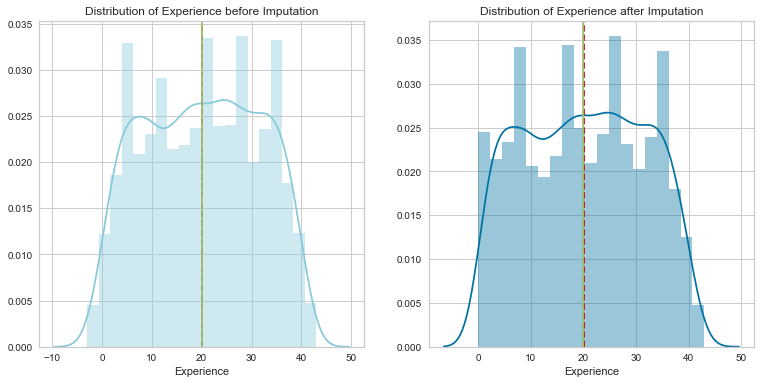

In [408]:
# Checking distribution of Experience column before and after imputation
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bplmData['Experience'], color = 'c', ax = ax).set_title('Distribution of Experience before Imputation')
ax.axvline(bplmData['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(bplmData['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

replace_value = bplmData.loc[(bplmData['Age'] > 23) & (bplmData['Age'] <= 29) & (bplmData['Income'] > 12) & (bplmData['Income'] < 150) & 
         (bplmData['Personal Loan'] == 0) & (bplmData['CD Account'] == 0), 'Experience'].median()

# replacing the negative values with 2
bplmData['Experience'] = np.where(bplmData['Experience'] < 0, replace_value, bplmData['Experience'])

ax = fig.add_subplot(122)
sns.distplot(bplmData['Experience'], color = 'b', ax = ax).set_title('Distribution of Experience after Imputation')
ax.axvline(bplmData['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(bplmData['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')


In [409]:
#Let us check if there are still Negative Values in the Experience attribute
bplmData[bplmData['Experience']<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Text(0.5, 1.0, 'Distribution of Income for taking Personal Loan')

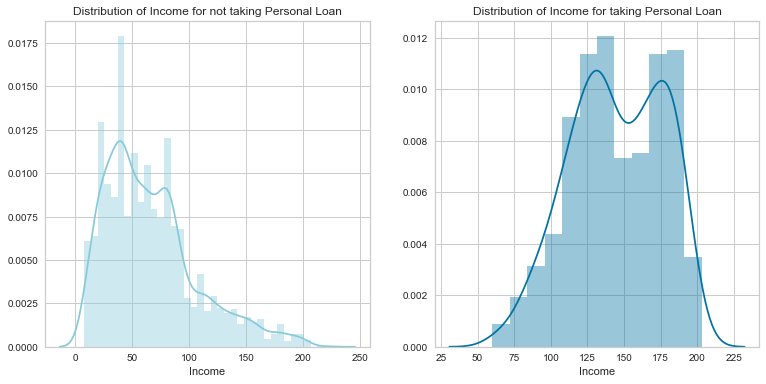

In [410]:
# Distribution of Income
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bplmData[(bplmData['Personal Loan'] == 0)]['Income'], color = 'c', 
             ax = ax).set_title('Distribution of Income for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bplmData[(bplmData['Personal Loan'] == 1)]['Income'], color = 'b', 
             ax = ax).set_title('Distribution of Income for taking Personal Loan')

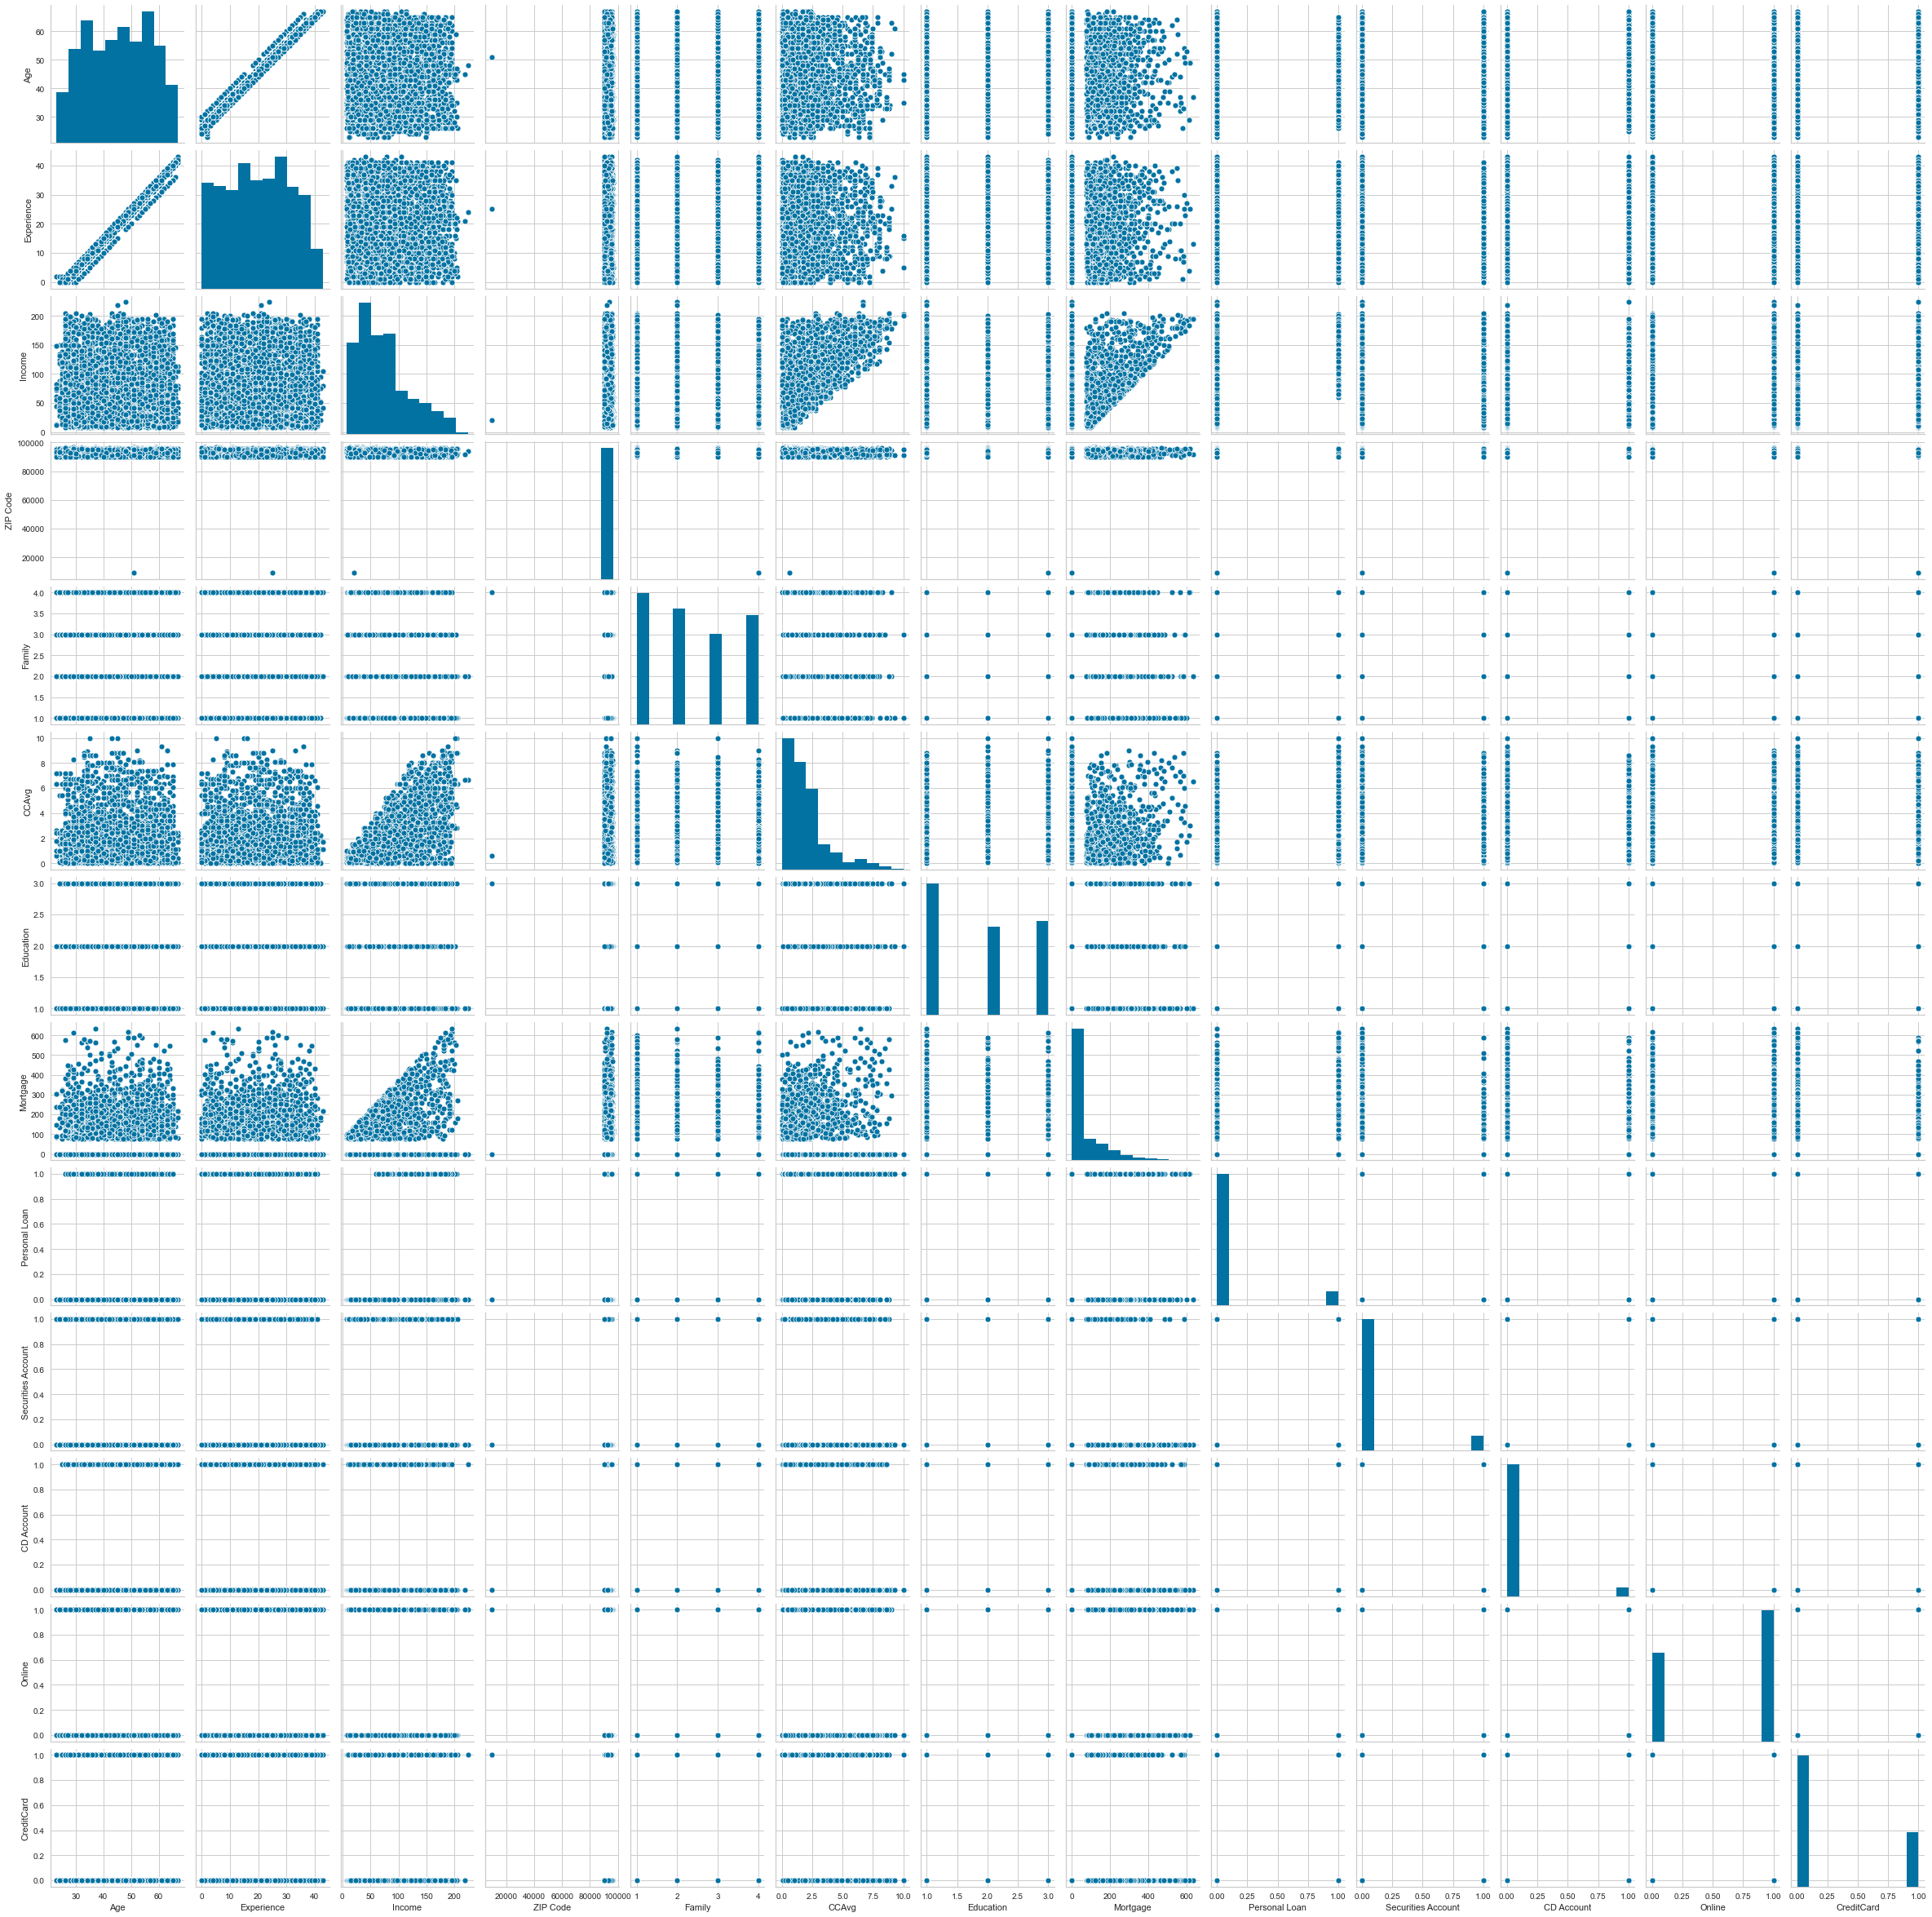

In [411]:
# Pairplot
sns.pairplot(bplmData)

Based from pairplots view:
- Age and Experience have strong positive correlation.
- ZIP Code has one outlier value which is less than 10K.
- People those who are taking Personal Loan that was offered to them in earlier campaign have a significantly different Income distribution then people who aren't taking the personal loan.
- CCAvg i.e. Average spending on cards differs for people taking the personal loan and those who aren't taking the personal loan.
- Family size is also an important factor for people considering taking personal loan from bank that was offered in earlier campaign and so is Mortgage, CD Account, Education (to some extent) among other variables.

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25.0,21,9307,4,0.6,3,0,0,0,0,1,1


Text(0.5, 1.0, 'Outlier in Zip Code')

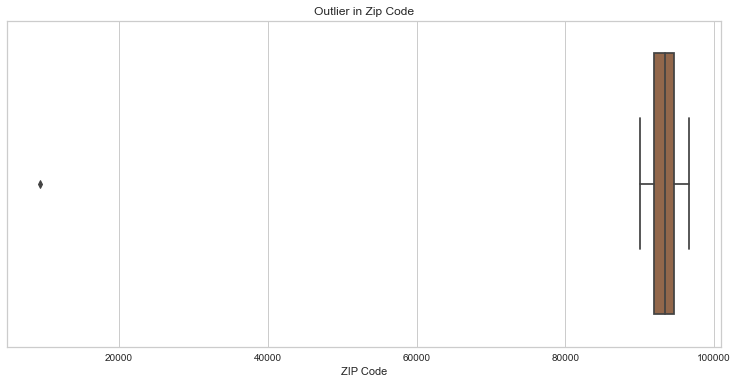

In [412]:
# Checking the outlier in ZIP Code
display(bplmData[bplmData['ZIP Code'] < 10000])
plt.figure(figsize = (12.8 , 6))
sns.boxplot(bplmData['ZIP Code'], palette = 'copper').set_title('Outlier in Zip Code')

In [413]:
# Drop index 384
bplmData.drop(384, axis = 0, inplace = True)

Text(0.5, 1.0, 'Distribution of Income by Personal Loan')

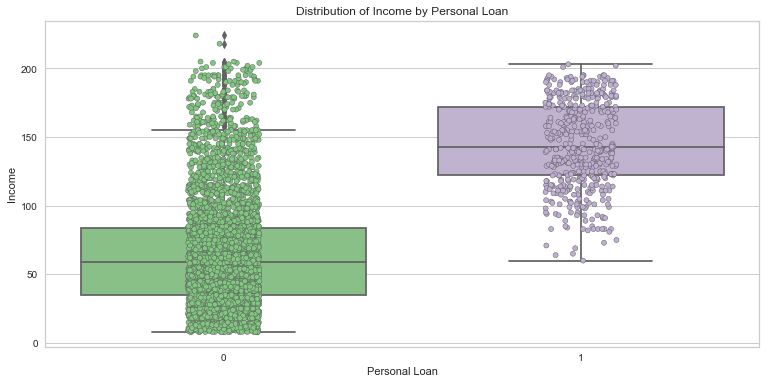

In [414]:
# Distribution of Income by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bplmData)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bplmData, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Income by Personal Loan')

Text(0.5, 1.0, 'Distribution of Average Spending on Credit Card by Personal Loan')

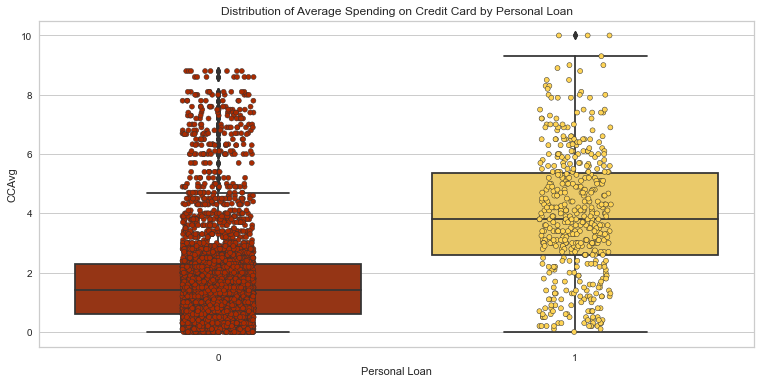

In [415]:
# Distribution of Average Spending on Credit Card by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bplmData)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bplmData, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Average Spending on Credit Card by Personal Loan')

<Figure size 921.6x432 with 0 Axes>

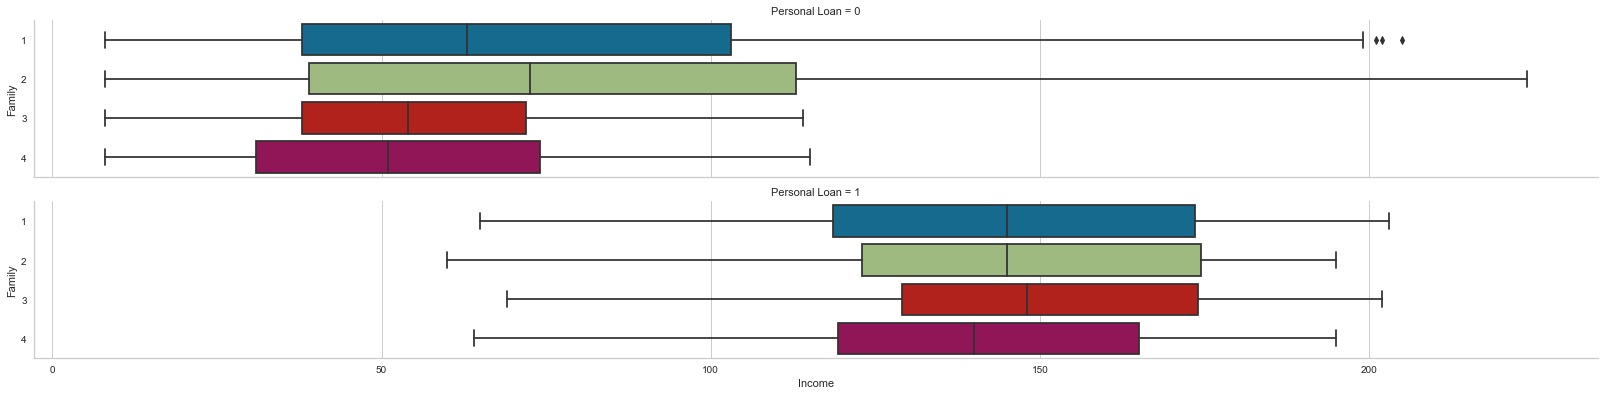

<Figure size 921.6x432 with 0 Axes>

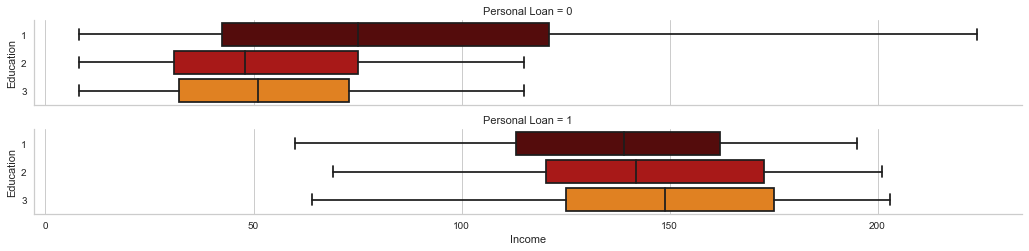

In [416]:
# Distribution of Family Size by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = bplmData)

# Distribution of Education by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', 
            height = 1.8, aspect = 8, palette = 'gist_heat', data = bplmData)

<AxesSubplot:xlabel='Education', ylabel='count'>

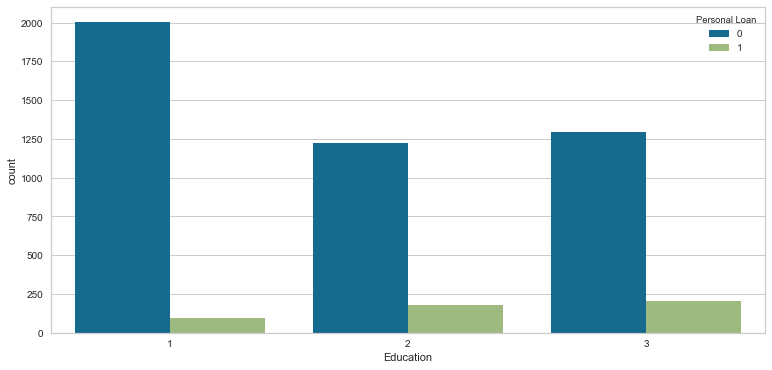

In [417]:
# Countplot of Education by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'Education', hue ='Personal Loan', data = bplmData)

<AxesSubplot:xlabel='CD Account', ylabel='count'>

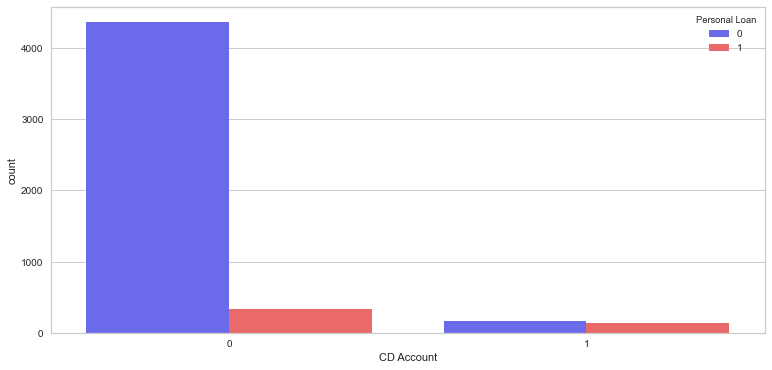

In [418]:
# Countplot of CD Account by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'CD Account', hue ='Personal Loan', palette = 'seismic', data = bplmData)

Analysis based from Income, CCAvg, Family (size), Mortgage, CD Account, Education and Personal Loan Attributes:

- During the banks' last campaign, most people with high income took the loan.
- Regardless of family size, High Income is proportionate to the likelihood of taking a loan. In other words, the Higher the - income the more chances it is for people to take the loan.
- The average spending on credit cards by people taking personal loan is higher than those who aren't taking the personal loan.
- Customers whose education Undergraduate (1) is having more income.
- As education level increases, so does the likelihood of people taking personal loan.
- Most of the people who don't have CD Account don't take personal loan. However, for people with CD Account, the odds of taking personal loan is similar to not taking it.

In [419]:
# Checking number of unique values for categorical columns
cat_cols = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
bplmData[cat_cols].nunique()

ZIP Code              466
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [420]:
#Removing ZIP Code from the analysis since it's a nominal variable and contains 466 unique values.
bplmData.drop([ 'ZIP Code'], axis = 1, inplace = True)
bplmData.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

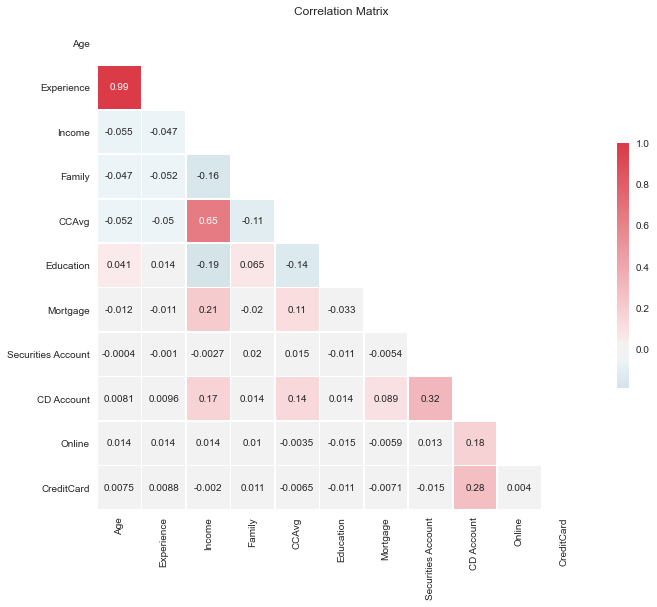

In [421]:
corr = bplmData.drop('Personal Loan', axis = 1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .6, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix')


<AxesSubplot:>

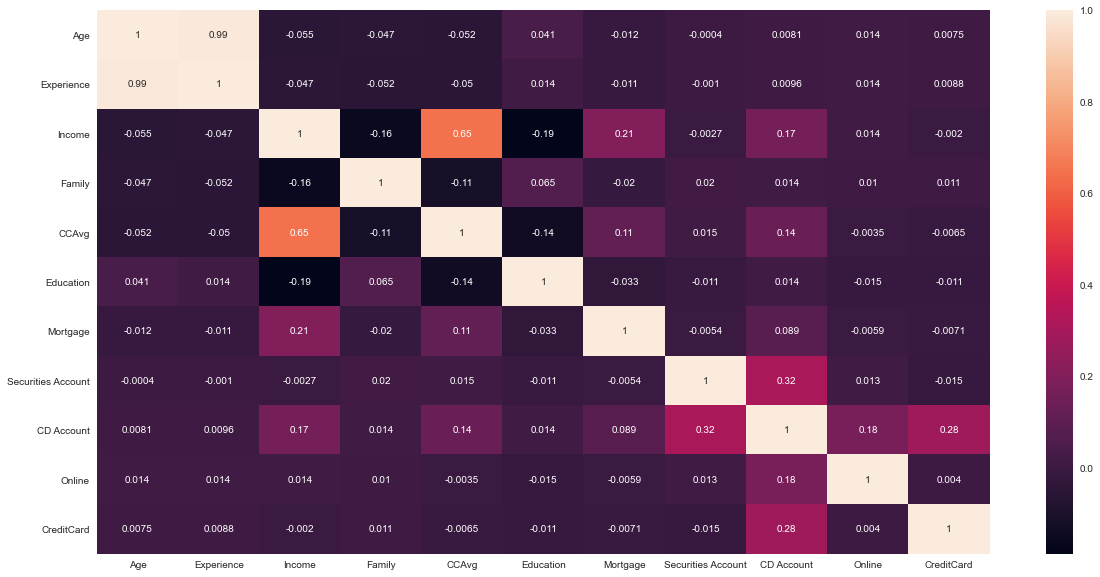

In [422]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

1. Age and experience are highly correlated with each other.
2. Personal Loan has maximum correlation with Income, CCAvg, CD Account, Mortgage and Education.
3. CCAvg, Personal Loan, Mortgage, CD Account are dependent on Income.
4. CD Account is dependent on Credit Card, Securities Account, Online, CCAvg and Income.
5. Mortgage is also correlated with Income.

In [423]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Experience  Age           0.993922
Age         Experience    0.993922
CCAvg       Income        0.645931
Income      CCAvg         0.645931
dtype: float64

In [424]:
# Absolute correlation of independent variables with 'Personal Loan' 
absCorrwithDep = []
allVars = bplmData.drop('Personal Loan', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(bplmData['Personal Loan'].corr(bplmData[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))


,Variable,Correlation
2,Income,0.502459
4,CCAvg,0.366864
8,CD Account,0.316344
6,Mortgage,0.142065
5,Education,0.136834
3,Family,0.0614708
7,Securities Account,0.0219321
1,Experience,0.00844902
0,Age,0.00769369
9,Online,0.00633189


---------------------

# Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [425]:
# Define dependent and independent variables
X = bplmData.drop(['Personal Loan'], axis = 1)
y = bplmData['Personal Loan']

display(X.describe().T, X.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Age,4999.0,45.337267,11.464033,23.0,35.0,45.0,55.0,67.0
Experience,4999.0,20.139428,11.406577,0.0,10.0,20.0,30.0,43.0
Income,4999.0,73.784757,46.032281,8.0,39.0,64.0,98.0,224.0
Family,4999.0,2.396079,1.147554,1.0,1.0,2.0,3.0,4.0
CCAvg,4999.0,1.938206,1.747731,0.0,0.7,1.5,2.5,10.0
Education,4999.0,1.880776,0.839804,1.0,1.0,2.0,3.0,3.0
Mortgage,4999.0,56.510102,101.720837,0.0,0.0,0.0,101.0,635.0
Securities Account,4999.0,0.104421,0.305836,0.0,0.0,0.0,0.0,1.0
CD Account,4999.0,0.060412,0.238273,0.0,0.0,0.0,0.0,1.0
Online,4999.0,0.596719,0.490605,0.0,0.0,1.0,1.0,1.0


(4999, 11)

(4999,)

# Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

In [426]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [427]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

In [428]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [429]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [430]:
print(accuracy_score(y_test,y_predict))#printing overall accuracy score

0.9433333333333334


In [431]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
3407,58,32.0,19,4,0.70,3,0,0,0,0,0,0,0
758,64,39.0,35,1,1.50,2,0,1,0,0,0,0,0
3625,47,21.0,71,4,2.90,1,0,0,0,1,0,0,0
4544,28,4.0,80,3,2.50,1,0,0,0,1,0,0,0
3236,44,14.0,19,1,0.75,3,0,0,0,0,1,0,0


In [432]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_predict))#creating confusion matrix

Confusion matrix
[[1329   23]
 [  62   86]]


In [433]:
#displaying precision,recall and f1 score.
df_table = confusion_matrix(y_test,y_predict)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  0.79
recall   :  0.58
F1 score :  0.67


In [434]:
print("precision:",precision_score(y_test,y_predict))
print("recall   :",recall_score(y_test,y_predict))
print("f1 score :",f1_score(y_test,y_predict))

precision: 0.7889908256880734
recall   : 0.581081081081081
f1 score : 0.669260700389105


In [435]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9511288939697057

Testing accuracy 0.9433333333333334

Confusion Matrix


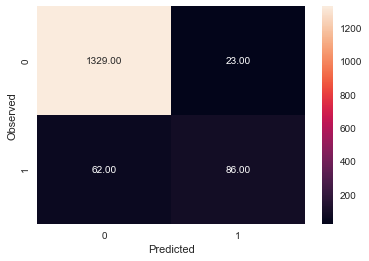

None

Recall: 0.581081081081081

Precision: 0.7889908256880734

F1 Score: 0.669260700389105

Roc Auc Score: 0.7820346233807773


In [436]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

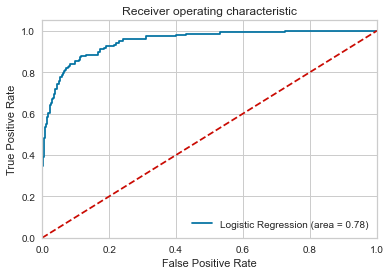

In [437]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

----------------

# Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)

In [438]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [439]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.955, 0.952, 0.951, 0.915, 0.911]

[0.945, 0.943, 0.945, 0.903, 0.901]


In [440]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.953, 0.911]

[0.945, 0.901]


In [441]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8948270934552729

Testing accuracy 0.8926666666666667


In [442]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.871, 0.885, 0.889, 0.894, 0.895, 0.895]

[0.861, 0.887, 0.893, 0.895, 0.894, 0.893]


Trainig accuracy 0.8939697056301801

Testing accuracy 0.8953333333333333

Confusion Matrix


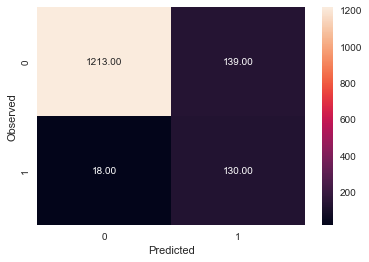

None

Recall: 0.8783783783783784

Precision: 0.483271375464684

F1 Score: 0.6235011990407674

Roc Auc Score: 0.8877838637454023


In [443]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

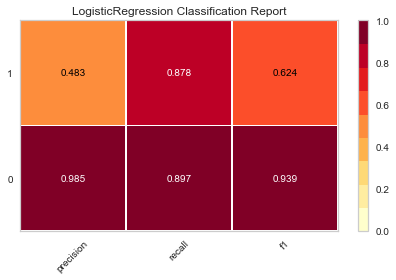

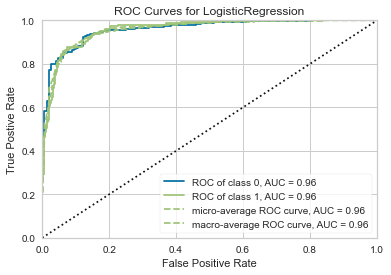

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [444]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [445]:
## To have an accurate score, let us create another set of data with scaling function applied to it.
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

In [446]:
# Apply Scaled training data to the logistic regression model
log_model2 = LogisticRegression()
log_model2.fit(ZX_train, y_train)

#Predict the test results
y_predict1 = log_model2.predict(ZX_test)

In [447]:
# Let us explore the coefficients for each of the independent attributes
coef_df = pd.DataFrame(log_model2.coef_)
print(coef_df)

         0         1         2         3         4         5        6   \
0 -0.300465  0.440653  2.518493  0.880303  0.224353  1.477466 -0.02993   

         7         8         9         10  
0 -0.268837  0.940844 -0.376712 -0.548812  


In [448]:
# Let us check the intercept for the model
intercept1 = log_model2.intercept_[0]
print("The intercept for Logistic Regression model is {}".format(intercept1))

The intercept for Logistic Regression model is -4.680788479868786


In [449]:
# Calculate the model score
log_model2_score = log_model2.score(ZX_test, y_test)
print("The Logistic Regression model accuracy with scaled data is {}".format(log_model2_score))

The Logistic Regression model accuracy with scaled data is 0.9533333333333334


In [450]:
# Print confusion matrix
print("The confustion matrix for Logistic Regression with scaled data is")
print(metrics.confusion_matrix(y_test, y_predict1))

The confustion matrix for Logistic Regression with scaled data is
[[1333   24]
 [  46   97]]


# Give Business understanding of your model? (5 marks)

Bussniss Insights

Our main objective is to develop a model that will predict the possibility of a liability customer buying personal loans with the bank's new marketing campaign using Logistic Regression. Using the confusion matrix, which is another metric that is often used to measure a logistic regression algorithm's performance, we were able to extract information about the actual and the predicted class. 
The Logistic Regression model accuracy with scaled data is 0.9533333333333334

The Confusion Matrix tells us the following:
There are two possible predicted classes: "Legible for Loan" and "Illegible for Loan." 
The classifier made a total of 1500 predictions (e.g., 1500 Banks' Clients were being studied).
Out of those 1500 cases, the classifier predicted "Legible" 121 times, and "Illegible " 1379 times.

Now the model accuracy for Logistic Regression with scaled data is 95.266%
True Postive is 97 & True negative is 1333.
False Postive is 24 & False nrgative is 46.
